Exercise 1

In [54]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels as sm
import sklearn as sl

import pandas as pd
import numpy as np

share_data = pd.read_csv('https://lectures.quantecon.org/py/_static/lecture_specific/pandas/data/ticker_data.csv')


In [55]:
share_data

,Date,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
0,2013-01-02,21.379999,27.620001,196.350006,79.930000,95.989998,549.029976,257.309998,77.070000,64.750000,37.599998,723.251230,11.510000,145.789993
1,2013-01-03,21.320000,27.250000,195.270004,79.029999,95.370003,542.099991,258.480011,77.470001,64.449997,37.599998,723.671256,11.490000,145.800003
2,2013-01-04,21.160000,26.740000,193.990005,79.400002,97.339996,526.999992,259.149994,77.690002,63.500000,37.660000,737.971262,11.140000,145.649994
3,2013-01-07,21.250000,26.690001,193.139999,79.680000,95.529999,523.900002,268.459991,76.129997,64.010002,37.299999,734.751286,10.970000,142.919998
4,2013-01-08,21.090000,26.549999,192.869995,78.529999,93.930000,525.310020,266.380005,74.129997,63.910000,37.040001,733.301227,10.720000,141.279999
5,2013-01-09,21.450001,26.700001,192.320007,78.959999,95.660004,517.100006,266.350006,76.760002,64.879997,37.029999,738.121237,10.740000,141.820007
6,2013-01-10,21.799999,26.459999,192.880005,78.690002,96.860001,523.509979,265.339996,77.089996,64.779999,36.959999,741.481263,11.050000,142.300003
7,2013-01-11,22.000000,26.830000,194.449997,76.660004,96.110001,520.300026,267.940002,75.160004,64.900002,36.910000,739.991260,11.090000,141.059998
8,2013-01-14,22.000000,26.889999,192.619995,76.949997,96.800003,501.750015,272.730011,76.550003,64.239998,36.990002,723.251230,11.280000,141.860001
9,2013-01-15,21.879999,27.209999,192.500000,76.830002,96.430000,485.920013,271.899994,76.940002,64.440002,37.320000,724.931273,11.230000,141.119995


In [43]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

yearly_changes = np.zeros(len(ticker_list))

# raw change
i = 0
for key in ticker_list:
    yearly_changes[i] = share_data.loc[len(share_data)-1, key] - share_data.loc[1, key]
    i = i + 1

# relative change
relative_yearly_changes = np.zeros(len(ticker_list))
i = 0
for key in ticker_list:
    relative_yearly_changes[i] = yearly_changes[i]/share_data.loc[1, key]
    i = i + 1

In [57]:
relative_yearly_changes
relative_yearly_changes = np.sort(relative_yearly_changes)
relative_yearly_changes

array([-0.24732513, -0.1370366 , -0.03943256,  0.03490132,  0.0986703 ,
        0.15205591,  0.21763598,  0.27838937,  0.37284404,  0.50478686,
        0.54282727,  0.54864788,  0.76184334])

In [52]:
x = np.linspace(1, len(relative_yearly_changes), len(relative_yearly_changes))

<BarContainer object of 13 artists>

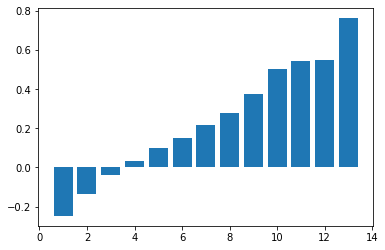

In [58]:
plt.bar(x, relative_yearly_changes, width=0.8)

In [59]:
ticker = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/ticker_data.csv')
ticker.set_index('Date', inplace=True)

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

price_change = pd.Series()



In [60]:
for tick in ticker_list:
    change = 100 * (ticker.loc[ticker.index[-1], tick] - ticker.loc[ticker.index[0], tick]) / ticker.loc[ticker.index[0], tick]
    name = ticker_list[tick]
    price_change[name] = change

price_change

Intel         21.421891
Microsoft     35.445325
IBM           -4.471606
BHP          -14.675345
Toyota        27.013231
Apple          2.183855
Amazon        54.984265
Boeing        77.098748
Qualcomm      14.671815
Coca-Cola      9.867030
Google        54.954725
Sony          50.217211
PetroChina   -24.727345
dtype: float64

In [ ]:
price_change.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(10,8))
price_change.plot(kind='bar', ax=ax)
plt.show()

Exercise 2

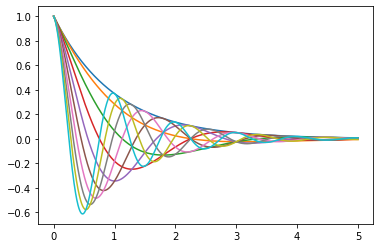

In [65]:
x = np.linspace(0, 5, 1000)
θ = np.linspace(0, 2, 10)

for param in θ:
    plt.plot(x, np.cos(np.pi * param * x)*np.exp(-x))